In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.tools
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [ ]:

## Create a dataframe called df and read in the csv from the web
dataset = ('sample_data/Life_Expectancy_Data_Updated.csv')## Assign a web source to a variable


## Create a dataframe called df and read in the csv from the web
df = pd.read_csv(dataset)

In [ ]:
## Looking at the first rows of the dataset

df.head()

In [ ]:
## looking at the statistical summary of the numerical columns in the dataset

df.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  2864.000000               2864.000000                2864.000000   
mean      7.632123                  0.206704                   0.793296   
std       3.171556                  0.405012                   0.405012   
min       1.100000                  0.000000                   0.000000   
25%       5.100000                  0.000000                   1.000000   
50%       7.800000                  0.000000                   1.000000   
75%      10.300000                  0.000000                   1.000000   
max      14.100000                  1.000000                   1.000000   

       Life_expectancy  
count      2864.000000  
mean         68.856075  
std           9.405608  
min          39.400000  
25%          62.700000  
50%          71.400000  
75%          75.400000  
max          83.800000

## Creating Boxplots to see the outliers for each column in the dataset

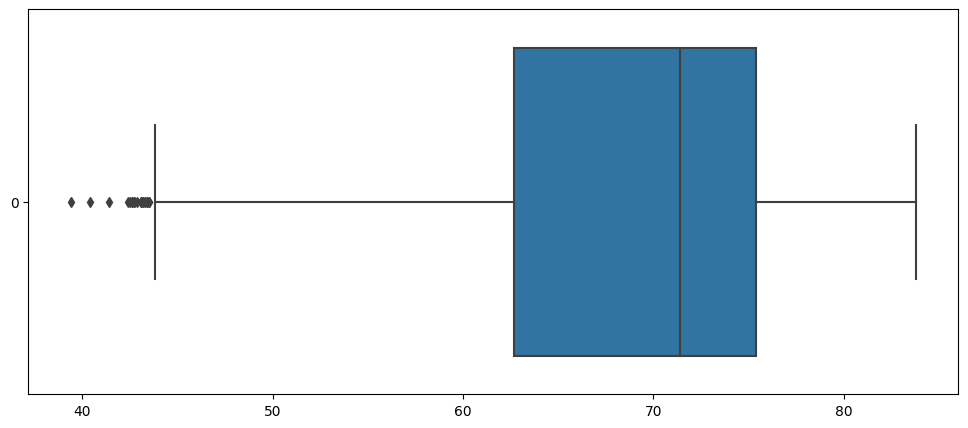

In [ ]:
## Here we can see a boxplot showing the data for the Life expectancy column, it ranges from around 44 to 84 years with some outliers before 44 years

plt.figure(figsize = (12,5))
sns.boxplot(data = df['Life_expectancy'],
            orient = 'h') # showing the plot horizontally
plt.show()

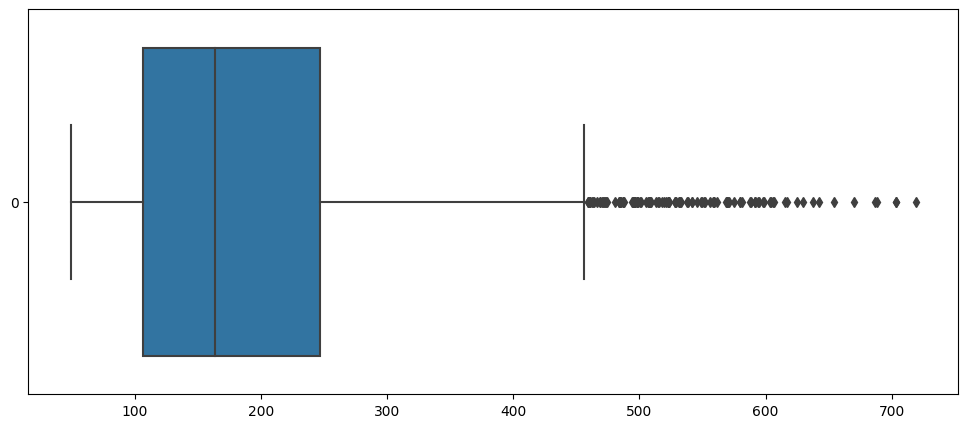

In [ ]:
## Here we can see a boxplot showing the data for the Adult Mortality column, it shows the probability of a person between 15 and 60 years old dying per 1000 people.
## You can see that after 450 people dying per 1000 there are lots of outliers

plt.figure(figsize = (12,5))
sns.boxplot(data = df['Adult_mortality'],
            orient = 'h')
plt.show()

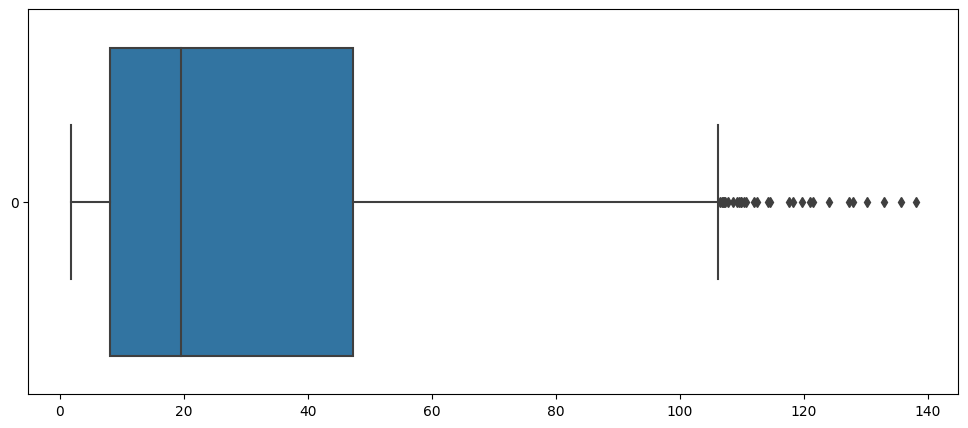

In [ ]:
## Here we can see a boxplot showing the data for the Infant deaths column, it shows the number of Infant Deaths per 1000 population
## You can see that after 105 infant deaths per 1000 there are lots of outliers

plt.figure(figsize = (12,5))
sns.boxplot(data = df['Infant_deaths'],
            orient = 'h')
plt.show()

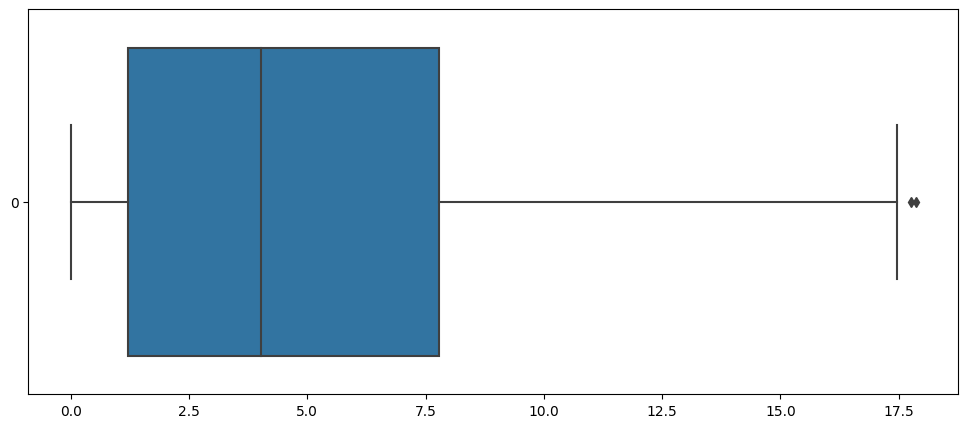

In [ ]:
## Here we can see a boxplot showing the data for the Alcohol consumption column, it shows the consumption (in litres of pure alcohol) per capita
## You can see that there are only 2 outliers within the data

plt.figure(figsize = (12,5))
sns.boxplot(data = df['Alcohol_consumption'],
            orient = 'h')
plt.show()




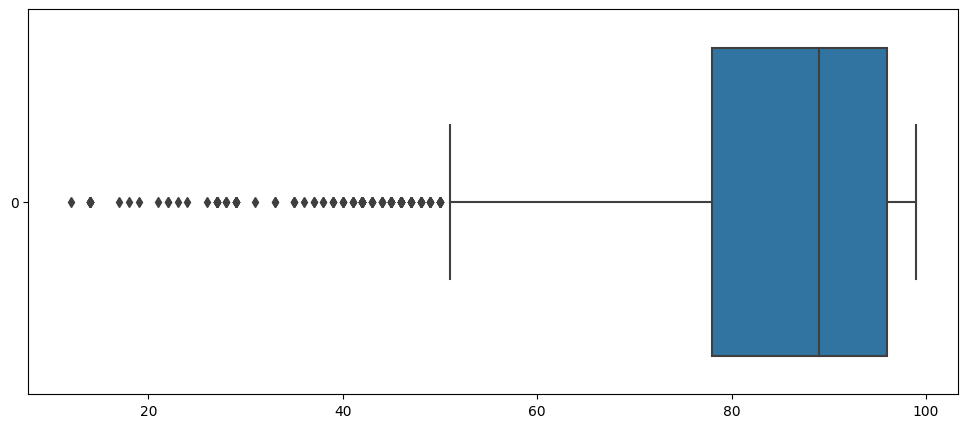

In [ ]:
## Here we can see a boxplot showing the data for the Hepatitis B column, it shows the immunization rate of Hepatitis B amongst 1-year-olds as a percentage
## The maximaum immunzation rate is 99%
## You can see that several countries have less than 50% immunization rate and this leads to outliers in our dataset

plt.figure(figsize = (12,5))
sns.boxplot(data = df['Hepatitis_B'],
            orient = 'h')
plt.show()

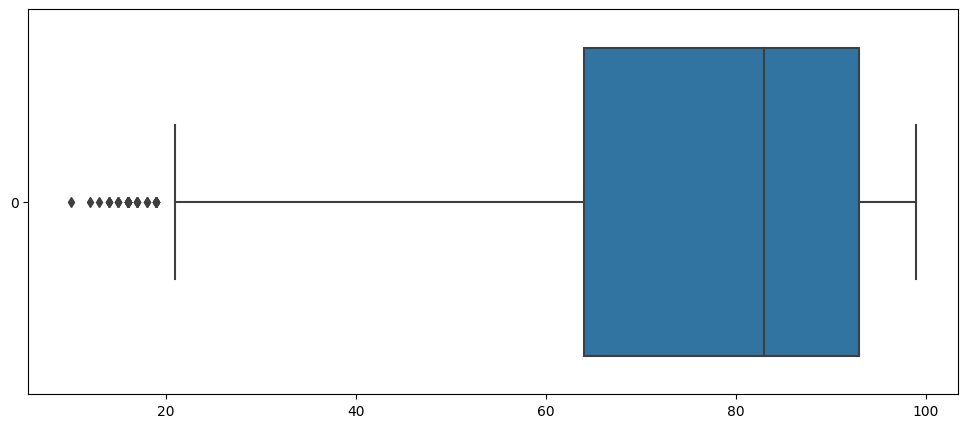

In [ ]:
# Here we can see a boxplot showing the data for the Measles column, it shows the reported cases of the measles per 1000 people
## You can see that there are a few outliers wihtin the dataset

plt.figure(figsize = (12,5))
sns.boxplot(data = df['Measles'],
            orient = 'h')
plt.show()

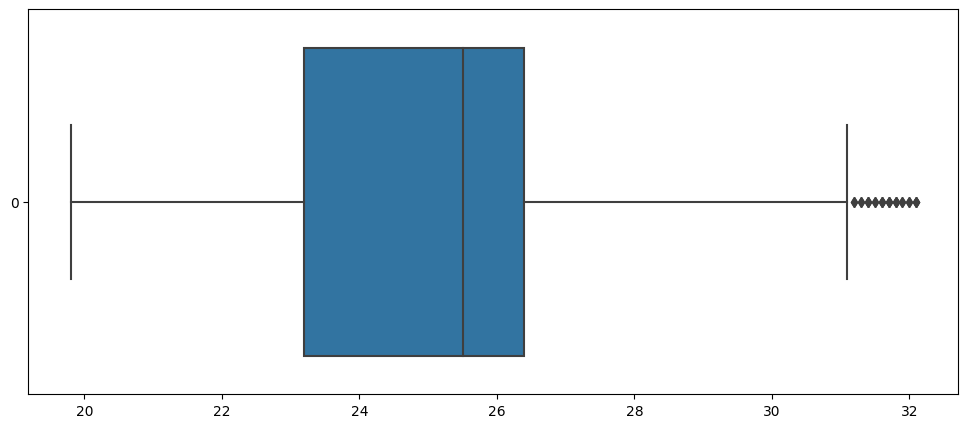

In [ ]:
# Here we can see a boxplot showing the data for the BMI column, it takes into account soemone's height and weight to see if they are healthy, underweight or overweight.
## As you can see here that there are a few outliers over 31 BMI which indicates on average there are a few countries that are obese

plt.figure(figsize = (12,5))
sns.boxplot(data = df['BMI'],
            orient = 'h')
plt.show()

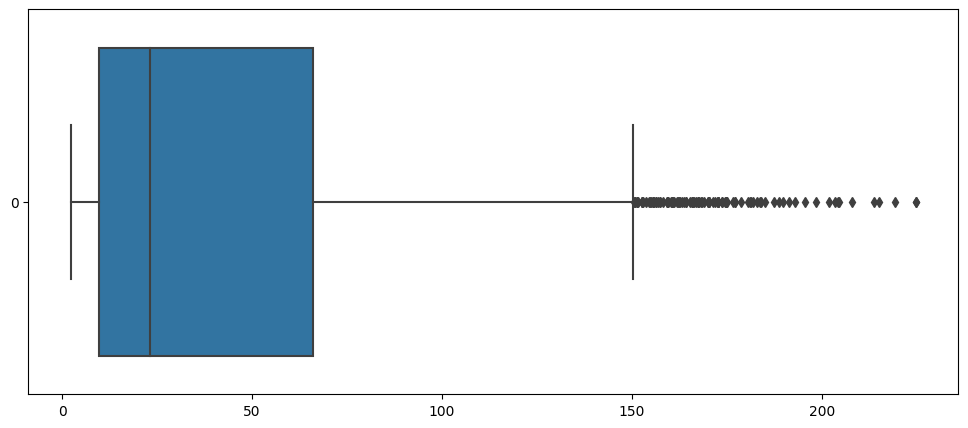

In [ ]:
## Here we can see a boxplot showing the data for the Under five deaths column it shows the number of deaths for kids under the age of 5 per 1000 people
## You can see that there are several outliers after 150 deaths per 1000 people

plt.figure(figsize = (12,5))
sns.boxplot(data = df['Under_five_deaths'],
            orient = 'h')
plt.show()

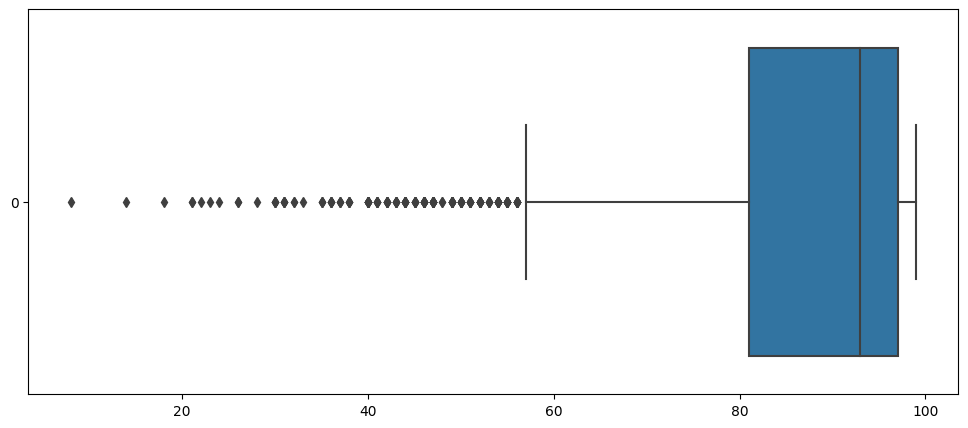

In [ ]:
## Here we can see a boxplot showing the data for the Polio column, it shows the immunization rate as a percentage for 1-year-olds
## You can see that there are some outliers under 58% of the countries

plt.figure(figsize = (12,5))
sns.boxplot(data = df[ 'Polio'],
            orient = 'h')
plt.show()

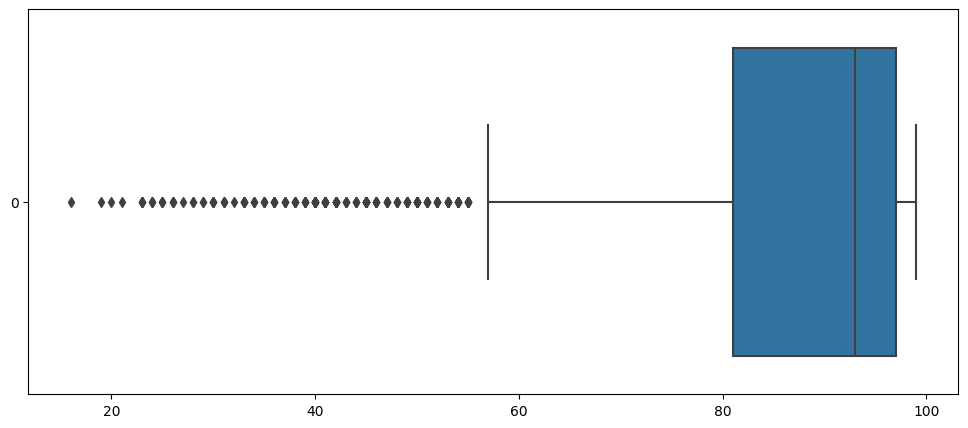

In [ ]:
## Here we can see a boxplot showing the data for the Diptheria column, it shows the immunization percentage rate 1-year-olds
## You can see that there are some outliers under 58% of the countries, this data is very similar to the polio boxplot

plt.figure(figsize = (12,5))
sns.boxplot(data = df[ 'Diphtheria'],
            orient = 'h')
plt.show()

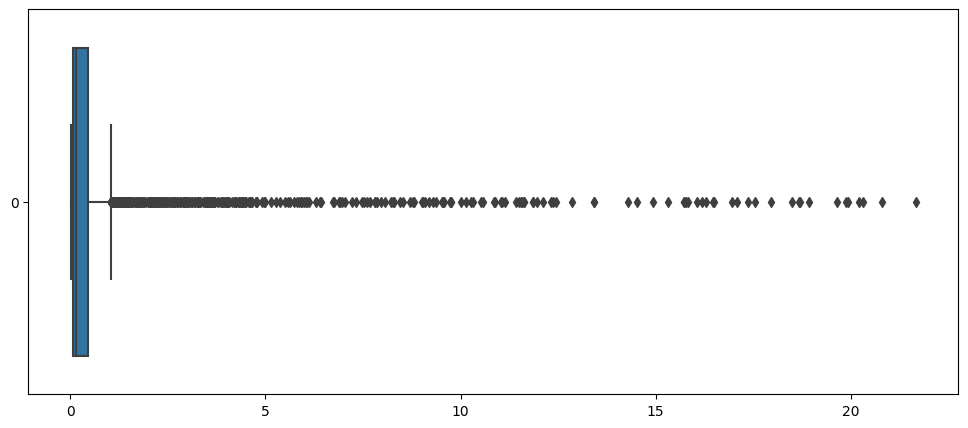

In [ ]:
## Here we can see a boxplot showing the data for the Incidents of HIV column, it shows the number of deaths per 1000 live births between ages 0 and 4 due to HIV/AIDS
## You can see after 2 deaths per 1000 there are lots of outliers

plt.figure(figsize = (12,5))
sns.boxplot(data = df[ 'Incidents_HIV'],
            orient = 'h')
plt.show()

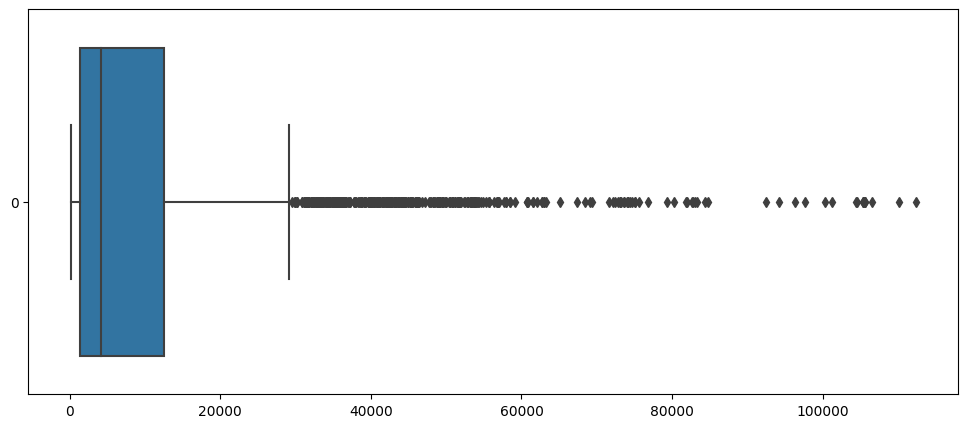

In [ ]:
## Here we can see a boxplot showing the data for the GDP per capita column, it shows the Gross Domestic Product per capita (in USD)
## You can see after 30000 USD there are sevral outliers this could be due the more developed countries performing better than a majority of the underdeveloped countires
##that have contributed to the average value of the box plot

plt.figure(figsize = (12,5))
sns.boxplot(data = df['GDP_per_capita'],
            orient = 'h')
plt.show()

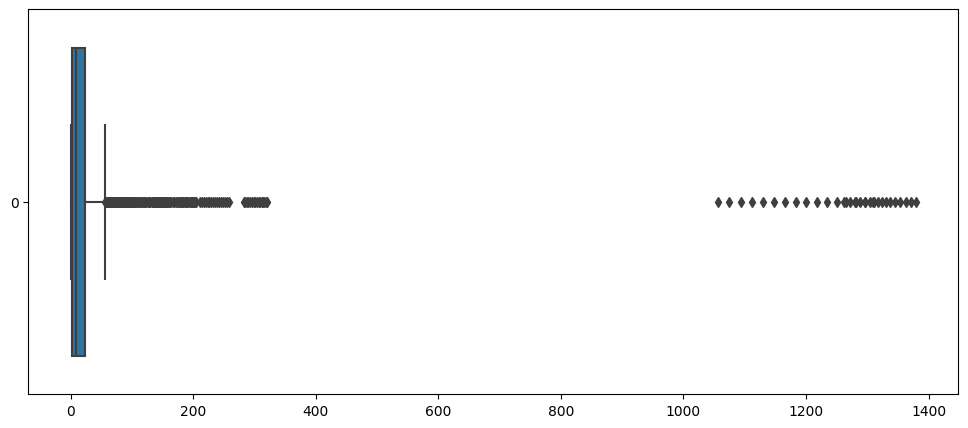

In [ ]:
## Here we can see a boxplot showing the data for the Population per million column of the country
## You can see that there are several outliers at two points of the boxplot, we have some outliers that are a few million more than the average and some counries that are a billion more
## than the average, these are countries like China and India

plt.figure(figsize = (12,5))
sns.boxplot(data = df['Population_mln'],
            orient = 'h')
plt.show()

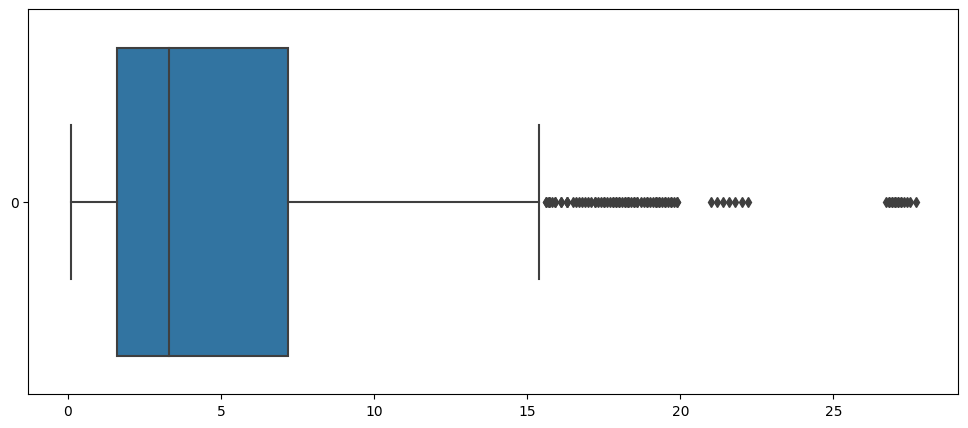

In [ ]:
## Here we can see a boxplot showing the data for the thinness of people between the age of ten and nineteen column of the country
## It shows the prevalence of thinness among children and adolescents aged between 10 and 19 as a percentage
## After 15% there are several outliers

plt.figure(figsize = (12,5))
sns.boxplot(data = df['Thinness_ten_nineteen_years'],
            orient = 'h')
plt.show()

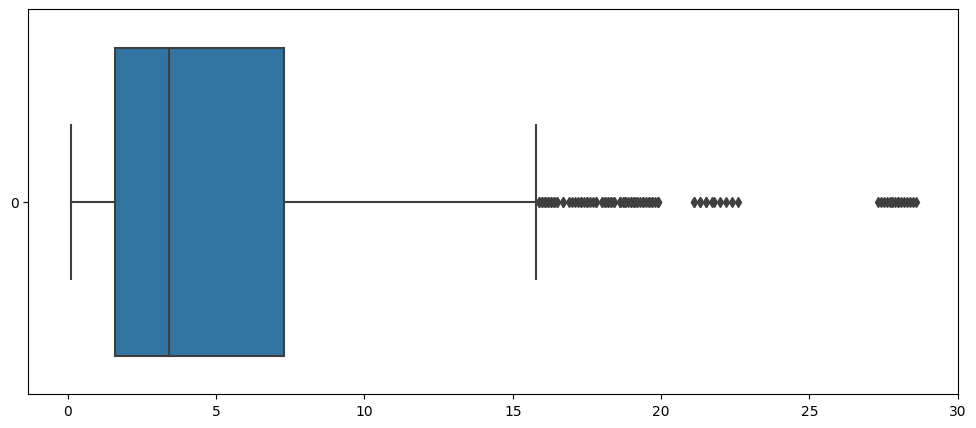

In [ ]:
## Here we can see a boxplot showing the data for the thinness of people between the age of five and nine column of the country
## It shows the prevalence of thinness among children and adolescents aged between 5 and 9 as a percentage
## After 15% there are several outliers, this data is very similar to the data of thinness between 10 ans 19

plt.figure(figsize = (12,5))
sns.boxplot(data = df['Thinness_five_nine_years'],
            orient = 'h')
plt.show()

In [ ]:
## Here we are looking at the correlation between the columns

df.corr()

<ipython-input-17-aaf7e79e0fff>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Year  Infant_deaths  Under_five_deaths  \
Year                         1.000000e+00      -0.172402          -0.176393   
Infant_deaths               -1.724017e-01       1.000000           0.985651   
Under_five_deaths           -1.763926e-01       0.985651           1.000000   
Adult_mortality             -1.586596e-01       0.794661           0.802361   
Alcohol_consumption         -6.105222e-04      -0.454526          -0.409367   
Hepatitis_B                  1.768241e-01      -0.512562          -0.507427   
Measles                      8.594472e-02      -0.526282          -0.512972   
BMI                          1.614225e-01      -0.661988          -0.665255   
Polio                        1.398584e-01      -0.740790          -0.742983   
Diphtheria                   1.451429e-01      -0.721875          -0.725355   
Incidents_HIV               -8.174257e-02       0.349458           0.369618   
GDP_per_capita               4.099817e-02      -0.512286          -0.469682   
Population_mln               1.515762e-02       0.007622          -0.005234   
Thinness_ten_nineteen_years -4.490053e-02       0.491192           0.466978   
Thinness_five_nine_years    -4.803775e-02       0.477639           0.450756   
Schooling                    1.505394e-01      -0.788513          -0.773196   
Economy_status_Developed    -5.026601e-15      -0.475866          -0.427134   
Economy_status_Developing    4.975598e-15       0.475866           0.427134   
Life_expectancy              1.743589e-01      -0.920032          -0.920419   

                             Adult_mortality  Alcohol_consumption  \
Year                               -0.158660            -0.000611   
Infant_deaths                       0.794661            -0.454526   
Under_five_deaths                   0.802361            -0.409367   
Adult_mortality                     1.000000            -0.244794   
Alcohol_consumption                -0.244794             1.000000   
Hepatitis_B                        -0.344882             0.168436   
Measles                            -0.416153             0.318603   
BMI                                -0.522866             0.284032   
Polio                              -0.524226             0.301926   
Diphtheria                         -0.513803             0.299016   
Incidents_HIV                       0.699119            -0.034118   
GDP_per_capita                     -0.510121             0.443966   
Population_mln                     -0.053848            -0.039119   
Thinness_ten_nineteen_years         0.382140            -0.446366   
Thinness_five_nine_years            0.379792            -0.433030   
Schooling                          -0.581035             0.615728   
Economy_status_Developed           -0.429375             0.670366   
Economy_status_Developing           0.429375            -0.670366   
Life_expectancy                    -0.945360             0.399159   

                             Hepatitis_B   Measles       BMI     Polio  \
Year                            0.176824  0.085945  0.161422  0.139858   
Infant_deaths                  -0.512562 -0.526282 -0.661988 -0.740790   
Under_five_deaths              -0.507427 -0.512972 -0.665255 -0.742983   
Adult_mortality                -0.344882 -0.416153 -0.522866 -0.524226   
Alcohol_consumption             0.168436  0.318603  0.284032  0.301926   
Hepatitis_B                     1.000000  0.429168  0.345421  0.724345   
Measles                         0.429168  1.000000  0.416321  0.514096   
BMI                             0.345421  0.416321  1.000000  0.457206   
Polio                           0.724345  0.514096  0.457206  1.000000   
Diphtheria                      0.761780  0.494059  0.426501  0.953178   
Incidents_HIV                  -0.075782 -0.150580 -0.161142 -0.147952   
GDP_per_capita                  0.159375  0.313724  0.336180  0.313786   
Population_mln                 -0.082396 -0.098222 -0.166482 -0.033486   
Thinness_ten_nineteen_years    -0.20845

<ipython-input-18-1dc1bb1e84c6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),
<ipython-input-18-1dc1bb1e84c6>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(df.corr()),


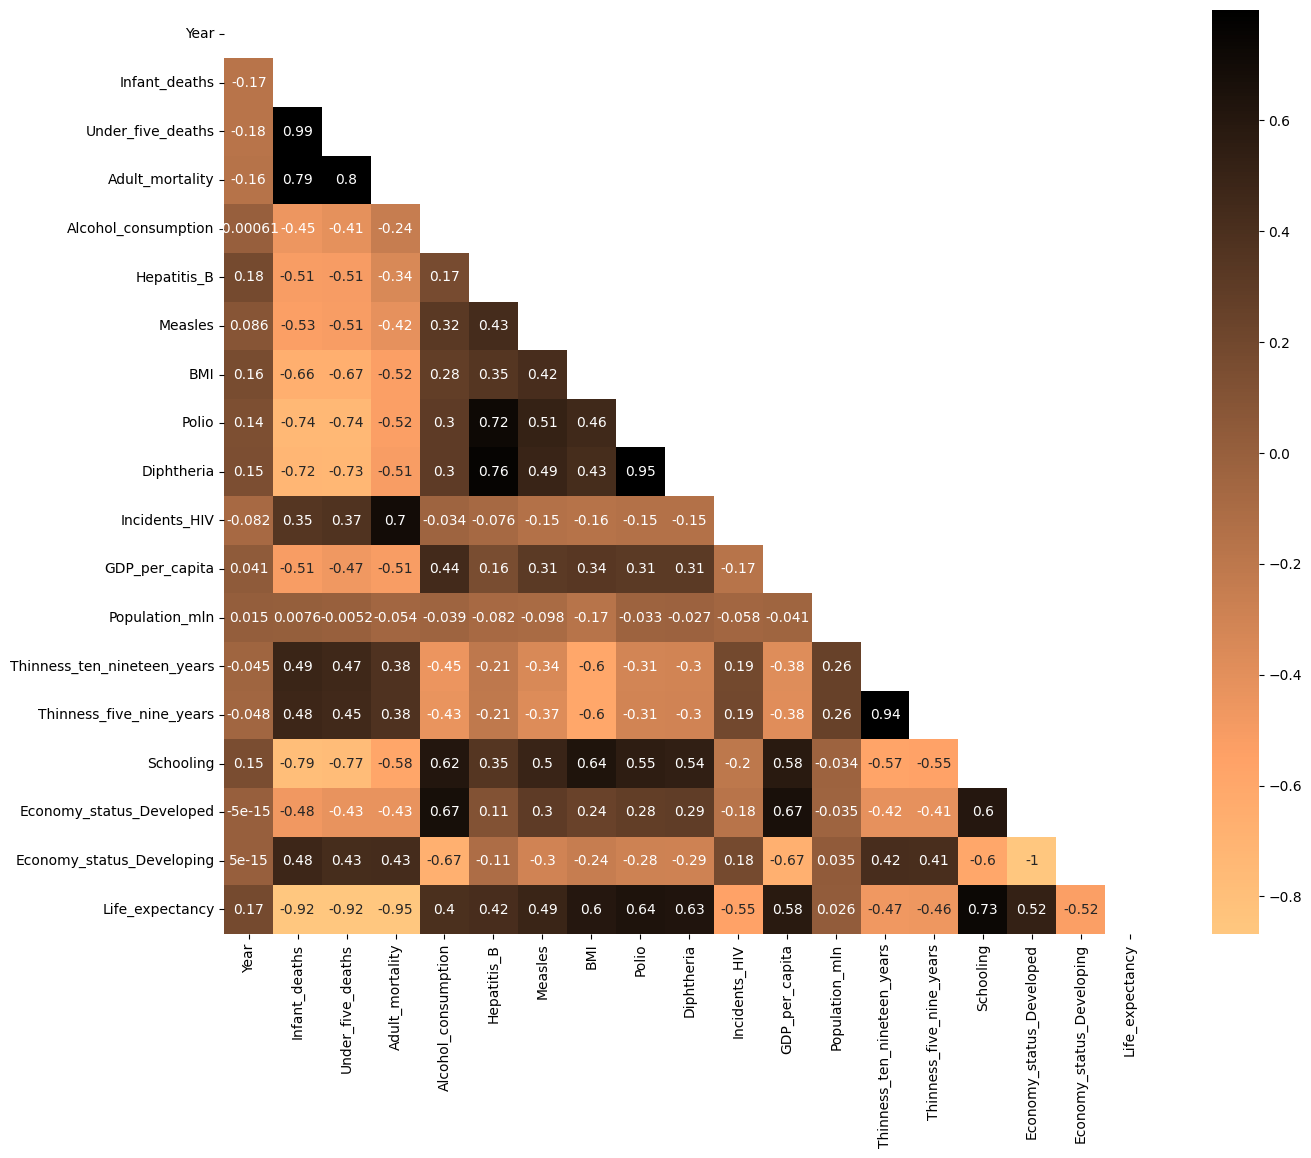

In [ ]:
## Here I am visualising the above correlation in a heatmap
## Within the heatmap you can see strong correlation between independant variables for example Polio and Diptheria have a very strong relationship
## Another strong realtionship is between Adult mortality and under five deaths
## The number of HIV incidents and Adult mortality have a somewhat strong correlation

## On the other hand there are some negative correlations betwen some columns
## For example our target column  - Life expectancy has very strong negative correlations between infant deaths, under five deaths andadult mortality.

plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(),
           annot=True,
           mask = np.triu(df.corr()),
           cmap = 'copper_r',
           robust=1)
plt.show()

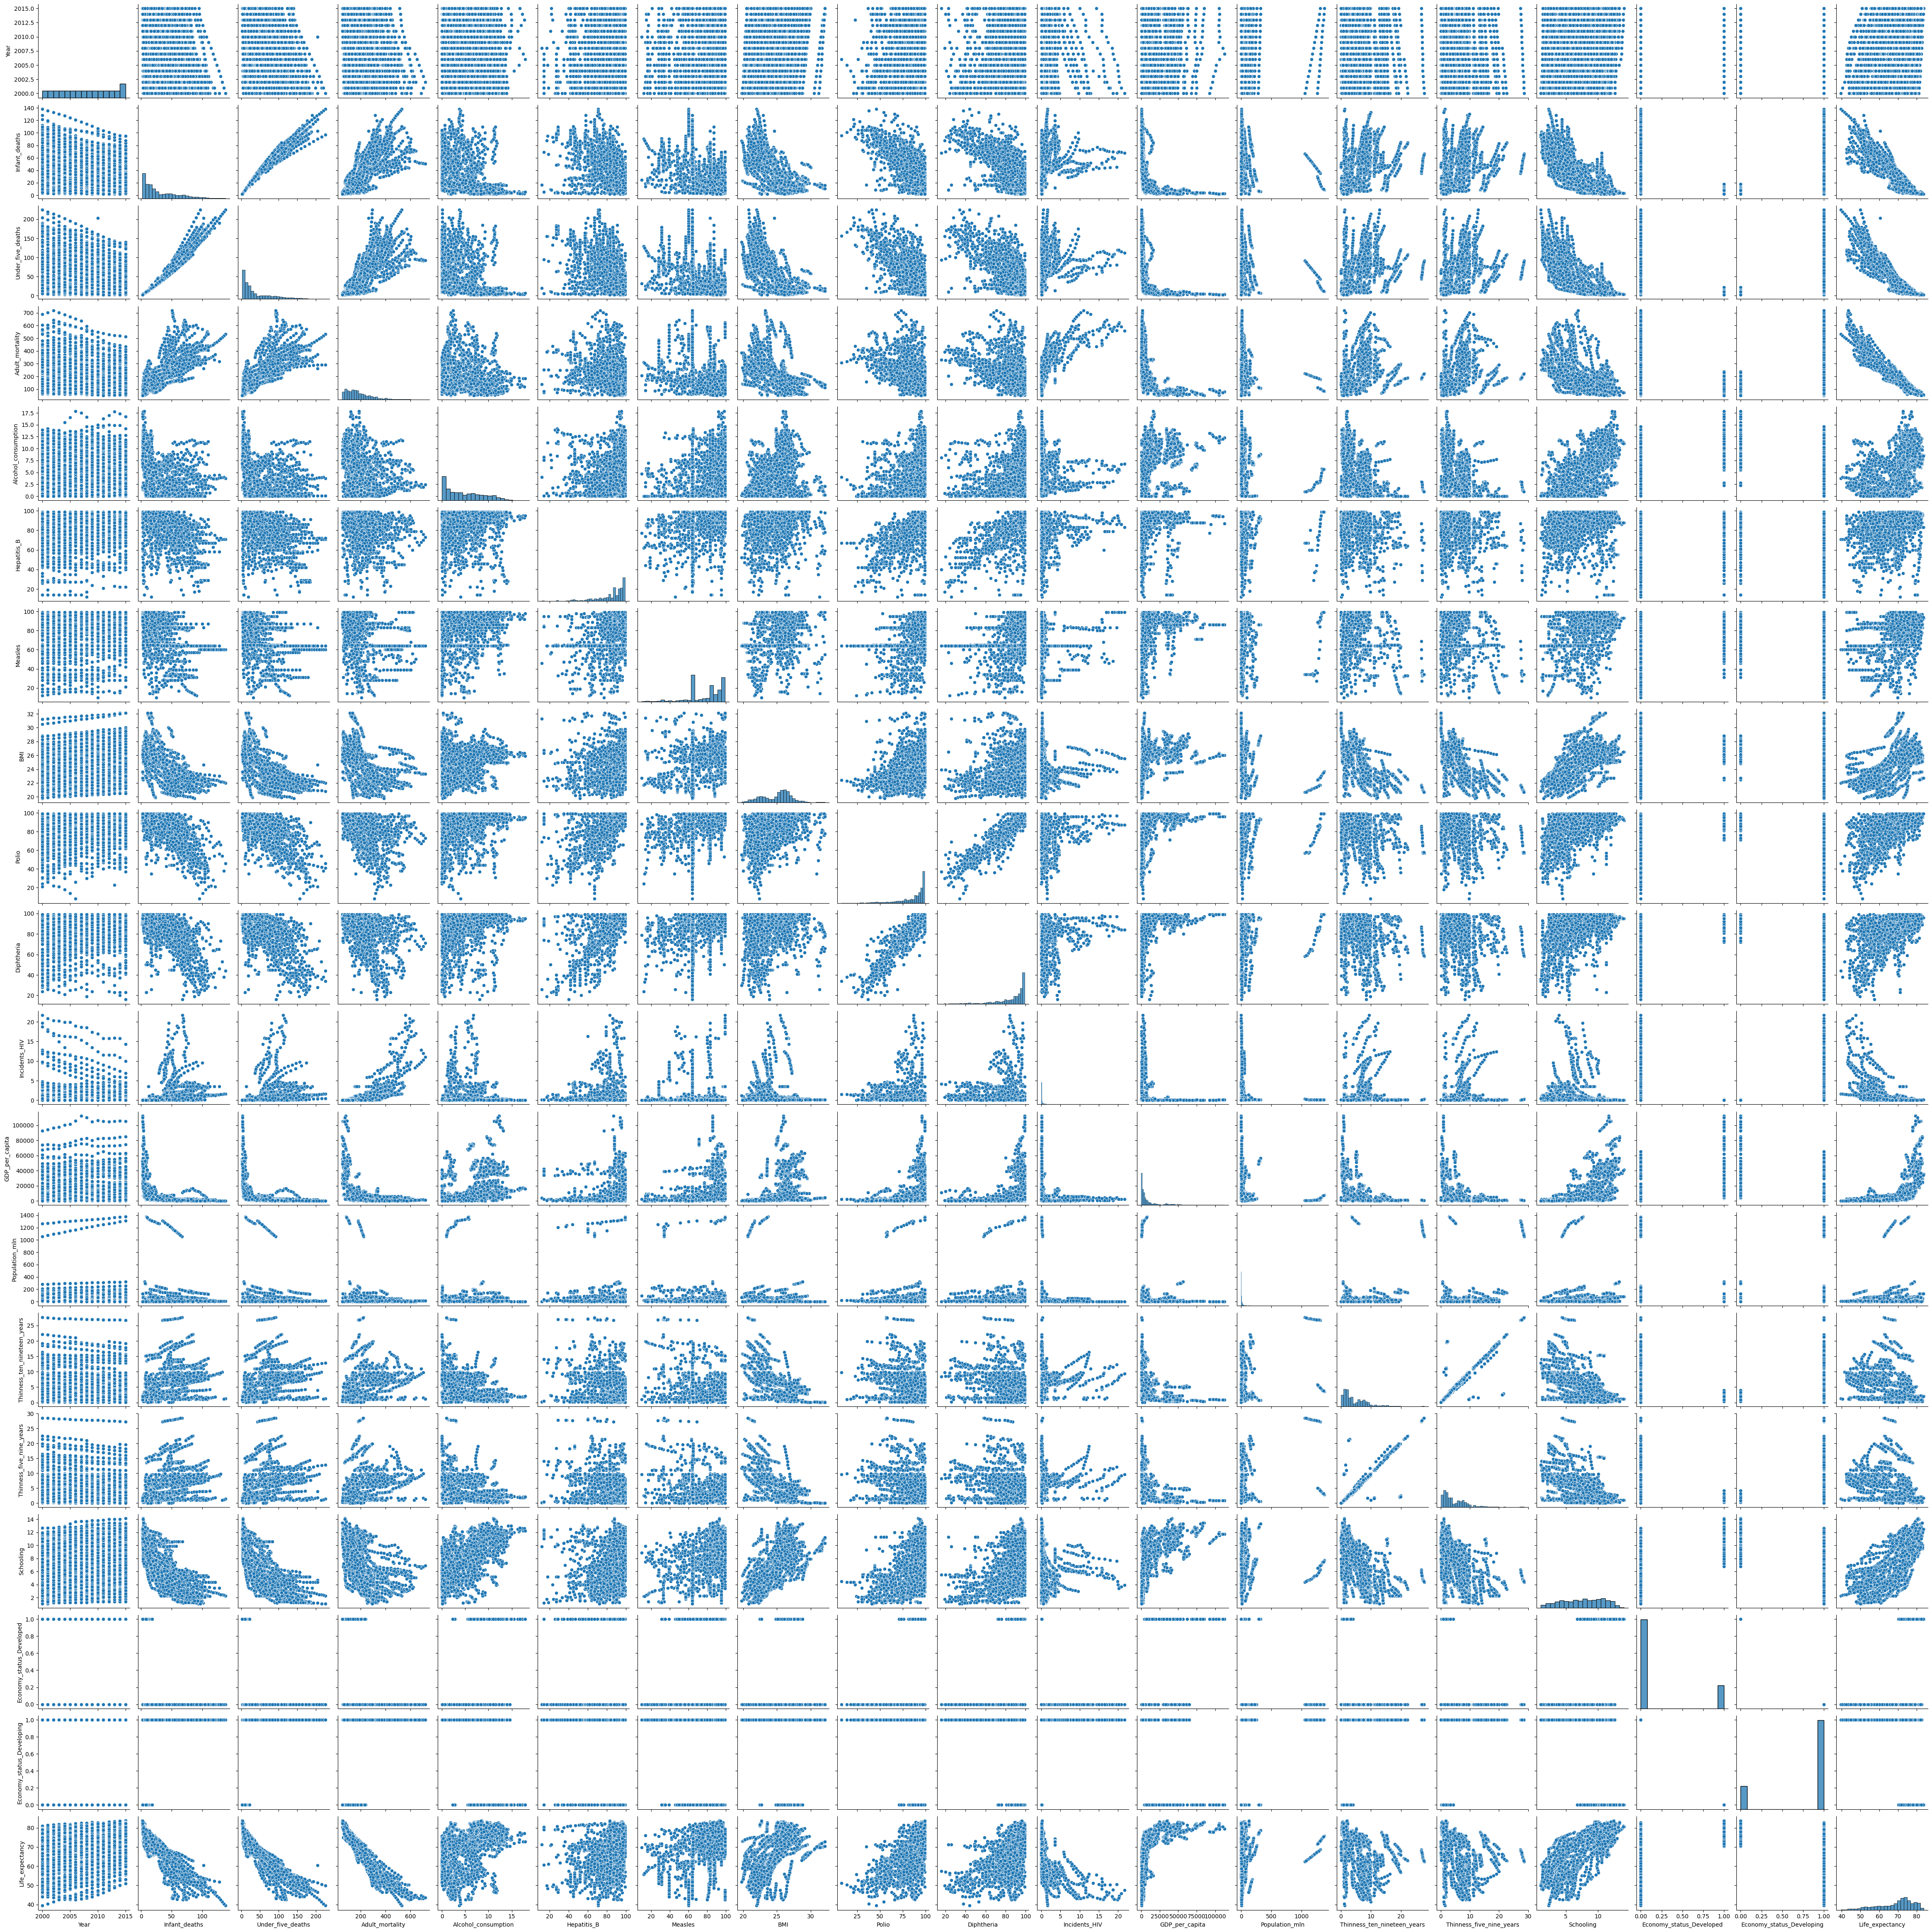

In [ ]:
## creating a pairplot to see all the scatterplot distributions between each column

sns.pairplot(df)
plt.show()